In [28]:
#libraries
import os
from keras import backend as k
from keras.models import Model
import numpy as np
import librosa
import librosa.display
import librosa.feature
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.style as ms
from keras.utils import to_categorical,np_utils
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Input,Conv1D
from keras.layers import MaxPooling2D, AveragePooling2D,MaxPooling1D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout
from keras import optimizers
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
ms.use('seaborn-muted')

In [2]:
#bring an sample
ex="lato.wav"
d,sr=librosa.load(ex)

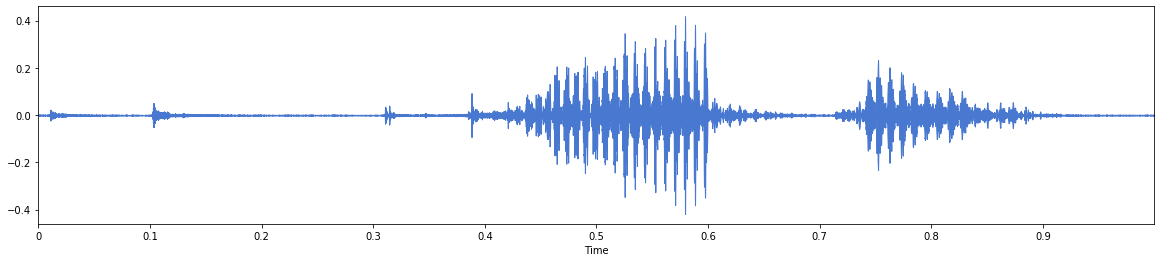

In [3]:
#visualize audio as wave
plt.figure(figsize=(20,4))
librosa.display.waveplot(d,sr=sr)

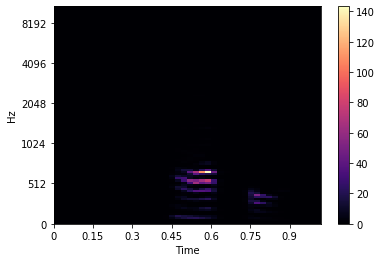

In [4]:
#visualize audio as spcetrogarm
melspec=librosa.feature.melspectrogram(y=d,sr=sr)
plt.figure()
librosa.display.specshow(melspec,y_axis='mel',x_axis='time')
plt.colorbar()

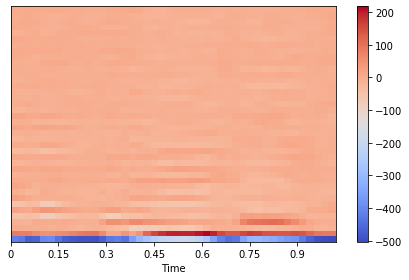

In [32]:
#visualize audio as mfcc digram
mfccs=librosa.feature.mfcc(y=d,sr=sr,n_mfcc=40)
plt.figure()
librosa.display.specshow(mfccs,x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.show()

In [6]:
#loading the data into variables X,Y
X=[]
Y=[]
train_path='train/audio/'
labels=os.listdir(train_path)
for label in labels:
    print(label)
    sounds=[f for f in os.listdir(train_path + '/' +label) if f.endswith('.wav')]
    for sound in sounds:
        samples ,sample_rate=librosa.load(train_path +'/'+label+'/'+sound,sr=16000)
        samples=librosa.resample(samples,sample_rate,8000)
        if(len(samples)==8000):
            X.append(samples)
            Y.append(label)    

bed
bird
cat
dog
down
eight
five
four
go
happy
house
left
marvin
nine
no
off
on
one
right
seven
sheila
six
stop
three
tree
two
up
wow
yes
zero


In [20]:
#preprocessing the input and output
#preprocess the output

le=LabelEncoder()
Y=le.fit_transform(Y)
classes=list(le.classes_)
Y=to_categorical(Y,num_classes=len(labels))

In [21]:
#preprocess the input
X=np.array(X).reshape(-1,8000,1)

In [22]:
#splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(np.array(X), np.array(Y), test_size=0.25, random_state=42)

In [25]:
#create the model
k.clear_session()
inputs=Input(shape=(8000,1))

#1st convolution layer
conv=Conv1D(8,13,padding='valid', activation='relu',strides=1)(inputs)
conv=MaxPooling1D(3)(conv)
conv=Dropout(0.3)(conv)          

#2nd convolution layer
conv=Conv1D(16,11,padding='valid', activation='relu',strides=1)(conv)
conv=MaxPooling1D(3)(conv)
conv=Dropout(0.3)(conv)

#3rd convolution layer
conv=Conv1D(32,9,padding='valid', activation='relu',strides=1)(conv)
conv=MaxPooling1D(3)(conv)
conv=Dropout(0.3)(conv)

#4rd convolution layer
conv=Conv1D(64,7,padding='valid', activation='relu',strides=1)(conv)
conv=MaxPooling1D(3)(conv)
conv=Dropout(0.3)(conv)

conv=Flatten()(conv)

conv=Dense(256, activation='relu')(conv)
conv=Dropout(0.3)(conv)    

conv=Dense(128, activation='relu')(conv)
conv=Dropout(0.3)(conv)    

outputs=Dense(len(labels),activation='softmax')(conv)
model= Model(inputs,outputs)

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
metrics=['accuracy'])
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.0001)
mc=ModelCheckpoint('best_model2.hdf5',monitor='val_acc',verbose=1,save_best_only=True,mode='max')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2662, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2662, 8)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 884, 16)           0   

In [26]:
#fitting the data
history=model.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[es,mc], epochs=100, batch_size=64,verbose=1)

Train on 43689 samples, validate on 14563 samples
Epoch 1/100
43689/43689 [==============================] - 463s 11ms/step - loss: 2.9502 - acc: 0.1330 - val_loss: 2.4428 - val_acc: 0.2587

Epoch 00001: val_acc improved from -inf to 0.25874, saving model to best_model2.hdf5
Epoch 2/100
43689/43689 [==============================] - 465s 11ms/step - loss: 2.0018 - acc: 0.3782 - val_loss: 1.7106 - val_acc: 0.4745

Epoch 00002: val_acc improved from 0.25874 to 0.47449, saving model to best_model2.hdf5
Epoch 3/100
43689/43689 [==============================] - 456s 10ms/step - loss: 1.5205 - acc: 0.5311 - val_loss: 1.1825 - val_acc: 0.6427

Epoch 00003: val_acc improved from 0.47449 to 0.64272, saving model to best_model2.hdf5
Epoch 4/100
43689/43689 [==============================] - 466s 11ms/step - loss: 1.2898 - acc: 0.6032 - val_loss: 1.0167 - val_acc: 0.7027

Epoch 00004: val_acc improved from 0.64272 to 0.70274, saving model to best_model2.hdf5
Epoch 5/100
43689/43689 [============

43689/43689 [==============================] - 296s 7ms/step - loss: 0.4885 - acc: 0.8472 - val_loss: 0.5494 - val_acc: 0.8357

Epoch 00039: val_acc did not improve from 0.84598
Epoch 40/100
43689/43689 [==============================] - 295s 7ms/step - loss: 0.4664 - acc: 0.8569 - val_loss: 0.5337 - val_acc: 0.8428

Epoch 00040: val_acc did not improve from 0.84598
Epoch 41/100
43689/43689 [==============================] - 295s 7ms/step - loss: 0.4676 - acc: 0.8535 - val_loss: 0.5611 - val_acc: 0.8343

Epoch 00041: val_acc did not improve from 0.84598
Epoch 42/100
43689/43689 [==============================] - 299s 7ms/step - loss: 0.4719 - acc: 0.8535 - val_loss: 0.5364 - val_acc: 0.8449

Epoch 00042: val_acc did not improve from 0.84598
Epoch 00042: early stopping


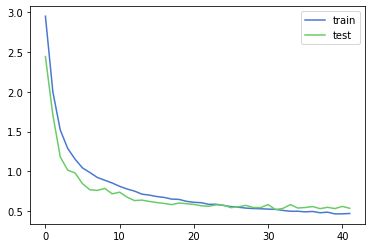

In [30]:
#ploting the accuracy
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [31]:
#the accuracy
test_eval = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.5363767728490194
Test accuracy: 0.844880862459658
